In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
disease = pd.read_csv('..//data/clean_df.csv',index_col=0)

In [32]:
disease.head()

,age,sex,dh,rbp,c,seizures,vc,ga,bt0,fc,exposed_to,fever,cholera
0,63,Male,3,145,233.0,1,0,150,0,0,0.0,0,1
1,37,Male,2,130,250.0,0,1,187,0,0,0.0,0,1
2,41,Female,1,130,204.0,0,0,172,0,2,0.0,0,1
3,56,Male,1,120,236.0,0,1,178,0,2,0.0,0,1
4,57,Female,0,120,354.0,0,1,163,1,2,0.0,0,1


In [33]:
disease.corr()

,age,dh,rbp,c,seizures,vc,ga,bt0,fc,exposed_to,fever,cholera
age,1.000000,-0.044250,0.288548,0.197710,0.115090,-0.114431,-0.337616,0.077033,-0.149863,0.334956,0.043139,-0.198234
dh,-0.044250,1.000000,0.047608,-0.077718,0.094444,0.044421,0.295762,-0.394280,0.119717,-0.225282,-0.036946,0.433798
rbp,0.288548,0.047608,1.000000,0.129687,0.177531,-0.114103,-0.046698,0.067616,-0.121475,0.102836,0.015718,-0.144931
c,0.197710,-0.077718,0.129687,1.000000,0.018558,-0.155998,-0.012734,0.073702,-0.010243,0.129914,0.009372,-0.092688
seizures,0.115090,0.094444,0.177531,0.018558,1.000000,-0.084189,-0.008567,0.025665,-0.059894,0.144643,-0.034043,-0.028046
vc,-0.114431,0.044421,-0.114103,-0.155998,-0.084189,1.000000,0.044123,-0.070733,0.093045,-0.110566,-0.081989,0.137230
ga,-0.337616,0.295762,-0.046698,-0.012734,-0.008567,0.044123,1.000000,-0.378812,0.386784,-0.263376,0.061858,0.421741
bt0,0.077033,-0.394280,0.067616,0.073702,0.025665,-0.070733,-0.378812,1.000000,-0.257748,0.144129,-0.056785,-0.436757
fc,-0.149863,0.119717,-0.121475,-0.010243,-0.059894,0.093045,0.386784,-0.257748,1.000000,-0.108032,-0.119161,0.345877
exposed_to,0.334956,-0.225282,0.102836,0.129914,0.144643,-0.110566,-0.263376,0.144129,-0.108032,1.000000,0.072447,-0.464357


According to our data, there is a correlation of 0.43 between cholera and dehidratation, which is significant enough to take into consideration but we might need more analysis to get a conclusion. For this reason, we try the linear regression test.

,dh,cholera
dh,1.000000,0.433798
cholera,0.433798,1.000000


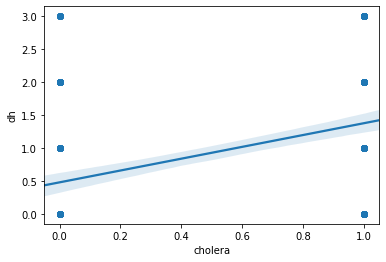

In [45]:
sns.regplot(x='cholera', y='dh', data = disease)
disease[['dh','cholera']].corr()

In [34]:
import statsmodels.api as sm
X = sm.add_constant(disease['cholera'])
model = sm.OLS(disease['dh'],X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     dh   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     69.77
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           2.47e-15
Time:                        16:06:00   Log-Likelihood:                -407.41
No. Observations:                 303   AIC:                             818.8
Df Residuals:                     301   BIC:                             826.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4783      0.079      6.032      0.0

Intially it seems difficult to say that cholera causes dehidratation because our test gives us a very low R-squared. This means, that although the coefficients of the constant and cholera might indiciate that there is a relation between them both, and the P value of cholera is very low as well. The low value of R-squared means that this test is not significant enough to make this conclusion.

In [35]:
Z = sm.add_constant(disease[['cholera','ga','fc','seizures']])
model = sm.OLS(disease.dh,Z)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     dh   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     20.90
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           3.34e-15
Time:                        16:06:03   Log-Likelihood:                -401.53
No. Observations:                 303   AIC:                             813.1
Df Residuals:                     298   BIC:                             831.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4182      0.363     -1.151      0.2

By adding other variables, we get a similar result. Having cholera a higher coefficient than other variables and a P value of 0 gives it a strong relationship with dehidratation. As the case before, the R-squared is low which does not give this model a very significant credibility.